In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
import sys, os

%matplotlib inline

In [2]:
def read_data(rootdir):
    data_list = {}
    for subdir, dirs, files in os.walk(rootdir):
        for fname in files:
            print os.path.join(subdir, fname)
            filepath = subdir + fname
            df = pd.read_csv(filepath, sep='\t')
            
            key_tmp = fname.split('.')[0]
            
            data_key = key_tmp.split('_')[1]
            data_list[data_key] = {}
            if fname.find("CRF") != -1:
                data_list[data_key] = {
                    'acc': df.iloc[:,4].tolist(),
                    'loss': df.iloc[:,1].tolist(),
                    'val_acc': df.iloc[:,3].tolist(),
                    'val_loss': df.iloc[:,2].tolist()
                }
            else:
                
                data_list[data_key] = {
                    'acc': df.iloc[:,1].tolist(),
                    'loss': df.iloc[:,2].tolist(),
                    'val_acc': df.iloc[:,3].tolist(),
                    'val_loss': df.iloc[:,4].tolist()
                }
    return data_list

In [4]:
data = read_data("../../data/results/performance/Other/")
print data

../../data/results/performance/Other/CW-BiGRU_Cell.tsv
../../data/results/performance/Other/CW-BiGRU_Sequence.tsv
../../data/results/performance/Other/CW-BiGRU_Chebi.tsv
../../data/results/performance/Other/CW-BiGRU_Protein.tsv
{'Cell': {'acc': [0.9303560221402396, 0.9854610624756821, 0.9954392414184846, 0.9964252881681264, 0.9960694386960196, 0.9968550281381316, 0.9973885601481792, 0.9975403480655208, 0.9977957683026146, 0.9978098907399032, 0.9982532741543048, 0.9982230762127364, 0.998249482610182, 0.9982413430906004, 0.9984121488371384], 'loss': [0.3476071109397695, 0.04555419702634055, 0.022859765760016137, 0.0163478728137388, 0.014299121432919747, 0.012206423382011026, 0.009578990989899243, 0.008756582812437179, 0.007560618766598813, 0.007385888541588221, 0.00604208599699039, 0.005619529366997162, 0.005583222106061343, 0.005017386015297686, 0.005225490134928118], 'val_acc': [0.9478990703919108, 0.9930840892572392, 0.9950148660408054, 0.9951348462736751, 0.9951796992585014, 0.995166

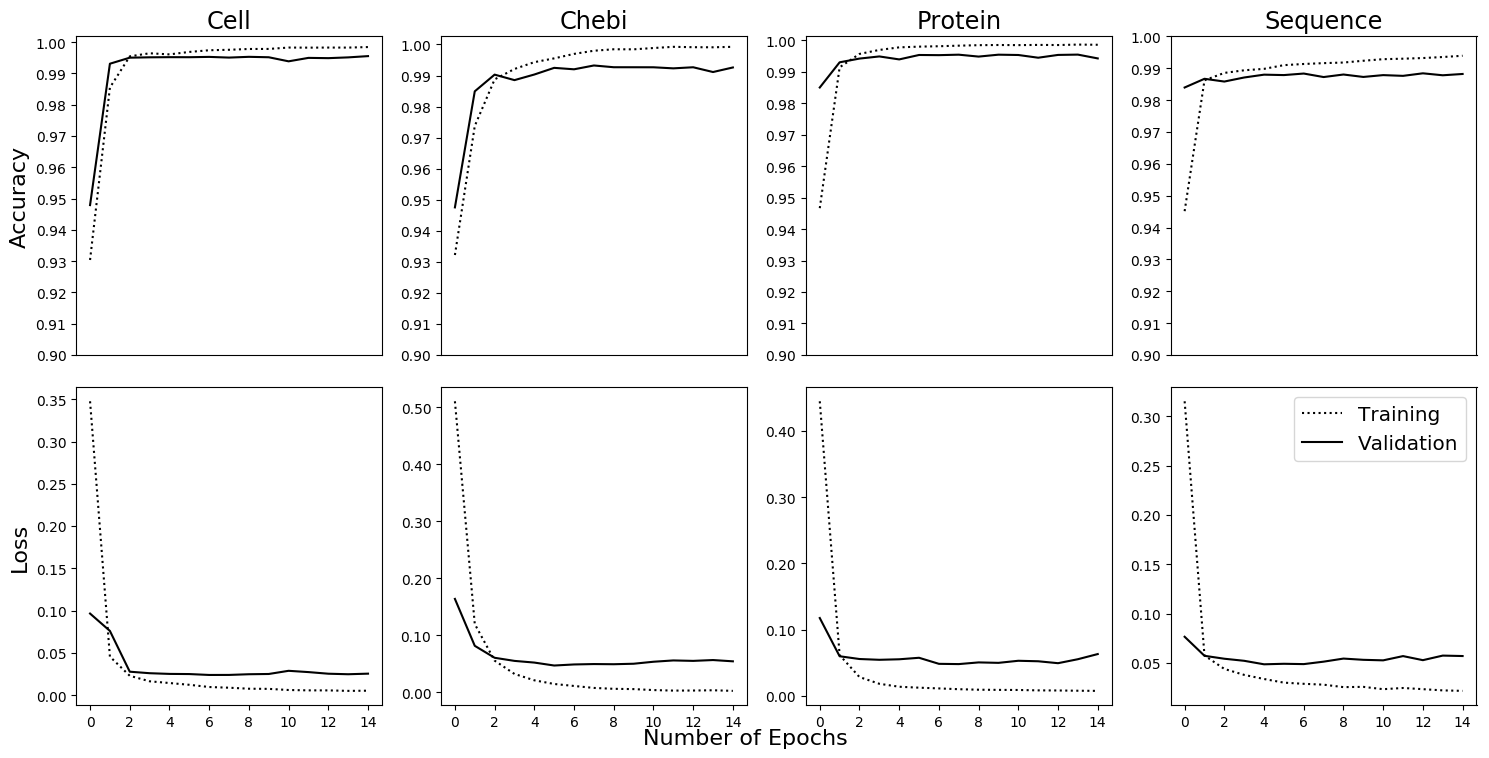

In [9]:
params = {'axes.titlesize':'xx-large'}
plt.rcParams.update(params)
n_rows = 1
n_colums = 4

n_plots = 8

fig = plt.figure(figsize=(15, 7.5), dpi=100)

outer = gridspec.GridSpec(n_rows, n_colums)

count = 0
x = list(range(0, 15))
for key,value in sorted(data.iteritems()):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[count], wspace=0.5, hspace=0.1)
    try:
        for j in range(2):
            ax = plt.Subplot(fig, inner[j])

            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #         t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i,j))
            if j==0:
                ax.plot(x, value["acc"], label='Training Accuracy', linestyle=':', color='black')
                ax.plot(x, value["val_acc"], label='Validation Accuracy', linestyle='-', color='black')
                ax.get_xaxis().set_visible(False)
                ax.yaxis.set_ticks(np.arange(.90, 1.01, 0.01))
                if count % 4 == 0:
                    ax.set_ylabel('Accuracy' , fontsize=16)
                ax.title.set_text(key)
            else:
                ax.plot(x, value["loss"], label='Training Loss', linestyle=':', color='black')
                ax.plot(x, value["val_loss"], label='Validation Loss', linestyle='-', color='black')
                ax.xaxis.set_major_locator(MaxNLocator(integer=True))
                if count % 4 == 0:
                    ax.set_ylabel('Loss' , fontsize=16)
                if count == 3:
                    handles, labels = ax.get_legend_handles_labels()
                    ax.legend(handles, ['Training', 'Validation'], fontsize="x-large", loc="upper right")
            fig.add_subplot(ax)
        count += 1
    except Exception as e:
        print e
        print len(value["acc"]), len(value["val_acc"]), key
    

fig.text(0.5, 0.0001, 'Number of Epochs', ha='center' , fontsize=16)
fig.tight_layout() 

plt.savefig('../../data/results/performance/loss_accuracy_other.eps',dpi=1200)